In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [3]:
# Load the dataset
data = pd.read_csv("insurance.csv")

In [4]:
# Show the first few rows of the dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Learn about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# View summary statistics of the dataset
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


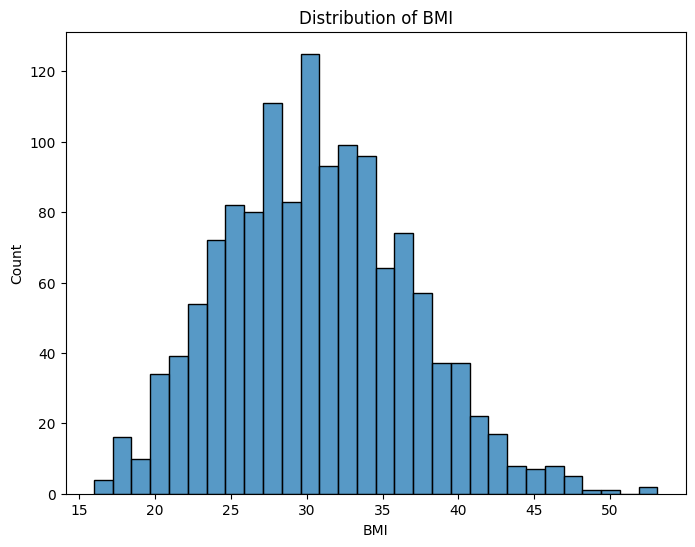

In [7]:
# Examine the distribution of BMI
plt.figure(figsize=(8, 6))
sns.histplot(data['bmi'], bins=30)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

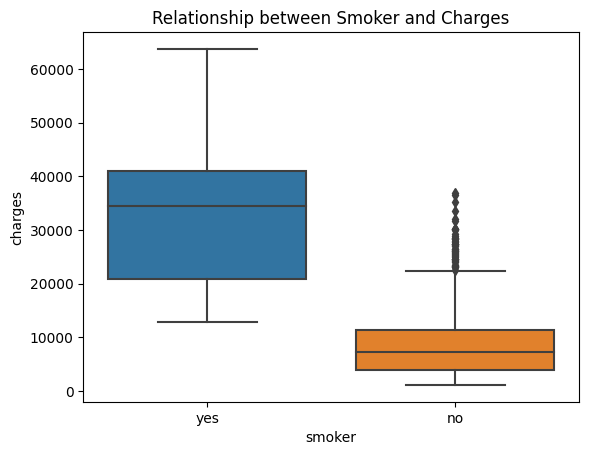

In [8]:
# Examine the relationship between "smoker" and "charges"
sns.boxplot(x="smoker", y="charges", data=data)
plt.title("Relationship between Smoker and Charges")
plt.show()

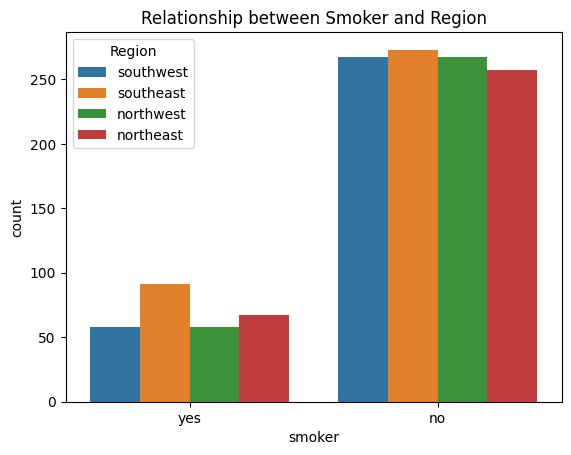

In [9]:
# Examine the relationship between "smoker" and "region"
sns.countplot(x="smoker", hue="region", data=data)
plt.title("Relationship between Smoker and Region")
plt.legend(title="Region")
plt.show()

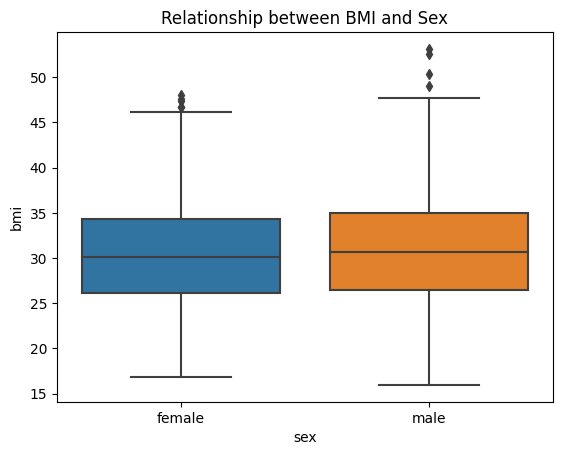

In [10]:
# Examine the relationship between "bmi" and "sex"
sns.boxplot(x="sex", y="bmi", data=data)
plt.title("Relationship between BMI and Sex")
plt.show()

In [11]:
# Find the "region" with the most "children"
region_children = data.groupby("region")["children"].sum().sort_values(ascending=False)
most_children_region = region_children.index[0]
print("Region with most children:", most_children_region)

Region with most children: southeast


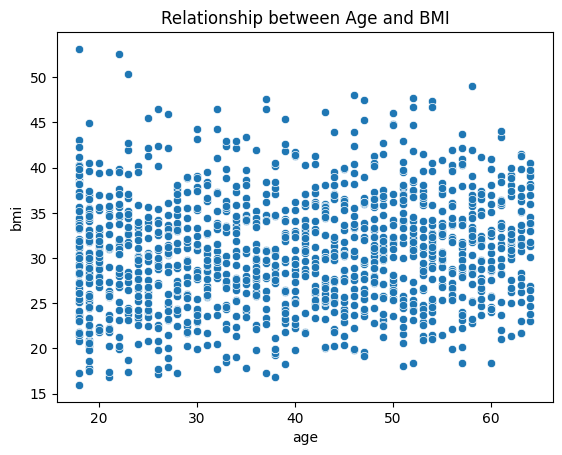

In [12]:
# Examine the relationship between "age" and "bmi"
sns.scatterplot(x="age", y="bmi", data=data)
plt.title("Relationship between Age and BMI")
plt.show()

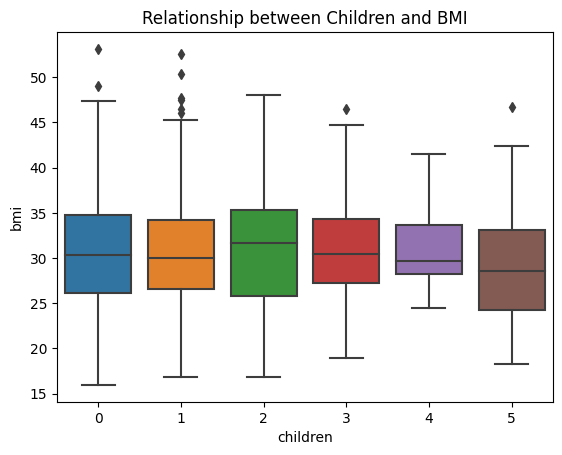

In [13]:
# Examine the relationship between "bmi" and "children"
sns.boxplot(x="children", y="bmi", data=data)
plt.title("Relationship between Children and BMI")
plt.show()

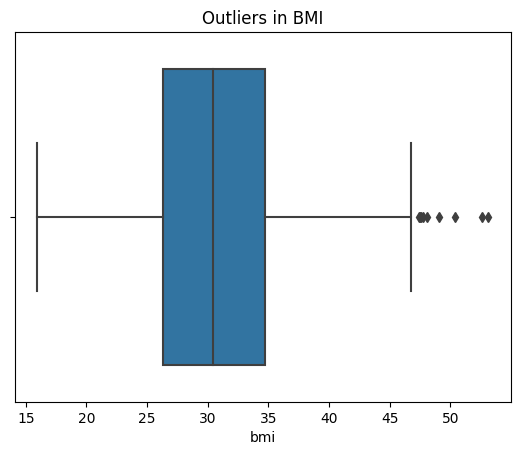

In [14]:
# Check for outliers in the "bmi" variable
sns.boxplot(x=data['bmi'])
plt.title("Outliers in BMI")
plt.show()

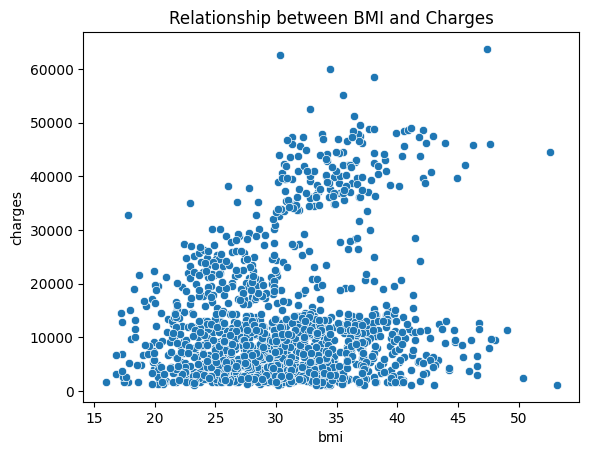

In [15]:
# Examine the relationship between "bmi" and "charges"
sns.scatterplot(x="bmi", y="charges", data=data)
plt.title("Relationship between BMI and Charges")
plt.show()

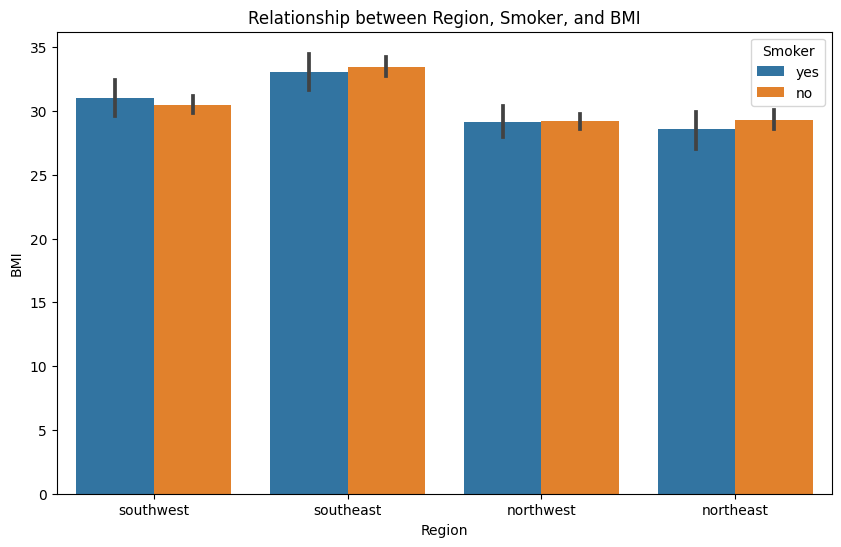

In [16]:
# Examine the relationship between "region", "smoker", and "bmi" using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="region", y="bmi", hue="smoker", data=data)
plt.title("Relationship between Region, Smoker, and BMI")
plt.xlabel("Region")
plt.ylabel("BMI")
plt.legend(title="Smoker")
plt.show()

In [17]:
# Label Encoding for "sex" and "smoker"
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
# One-Hot Encoding for "region"
data_encoded = pd.get_dummies(data, columns=['region'], drop_first=True)

In [18]:
# Splitting the dataset
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Scaling the dataset using Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Initialize and train Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [21]:
# Initialize and train Random Forest Regression
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [22]:
# Rastgele Orman Regresyon modelinin performansını değerlendirin
random_forest_scores = cross_val_score(random_forest_reg, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
random_forest_rmse_scores = np.sqrt(-random_forest_scores)
random_forest_rmse_scores.mean()

4952.815215286888

In [32]:
# Define hyper-parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_reg, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 6], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'n_estimators': [100]})

In [33]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.84851944590246


In [34]:
# Predictions
y_pred = grid_search.predict(X_test_scaled)

In [35]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 19792370.925257914
Mean Absolute Error: 2588.6565981396216
